In [42]:
import sys
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import boto3

In [5]:
# read in data
#dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']
data = pd.read_csv("all_data.csv")
data.head()

,id,co2,fuel,noise,timestep_time,vehicle_co,vehicle_co2,vehicle_hc,vehicle_nox,vehicle_pmx,...,vehicle_lane,vehicle_noise,vehicle_pos,vehicle_route,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y,__dt
0,1.0,2624.72,1.13,55.94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-14 00:00:00.000
1,1.0,2624.72,1.13,55.94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-14 00:00:00.000
2,1.0,2624.72,1.13,55.94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-14 00:00:00.000
3,NaN,NaN,NaN,NaN,1.0,164.78,2624.72,0.81,1.20,0.07,...,5337487#3_0,55.94,5.10,!veh2!var#1,0.00,veh_passenger,0.0,23726.22,25284.67,2022-11-14 00:00:00.000
4,NaN,NaN,NaN,NaN,22.0,148.35,7902.36,0.86,3.45,0.17,...,737358450#9_0,70.64,5.21,!veh1!var#1,8.98,veh_passenger,0.0,29160.29,24478.17,2022-11-14 00:00:00.000


In [6]:
# clean up data set getting rid of nan rows and columns
data= data.iloc[3:,4:]
data.head()

,timestep_time,vehicle_co,vehicle_co2,vehicle_hc,vehicle_nox,vehicle_pmx,vehicle_angle,vehicle_eclass,vehicle_electricity,vehicle_fuel,...,vehicle_lane,vehicle_noise,vehicle_pos,vehicle_route,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y,__dt
3,1.0,164.78,2624.72,0.81,1.20,0.07,271.07,HBEFA3/PC_G_EU4,0.0,1.13,...,5337487#3_0,55.94,5.10,!veh2!var#1,0.00,veh_passenger,0.0,23726.22,25284.67,2022-11-14 00:00:00.000
4,22.0,148.35,7902.36,0.86,3.45,0.17,180.83,HBEFA3/PC_G_EU4,0.0,3.40,...,737358450#9_0,70.64,5.21,!veh1!var#1,8.98,veh_passenger,0.0,29160.29,24478.17,2022-11-14 00:00:00.000
5,30.0,29.26,4012.68,0.23,1.50,0.06,270.83,HBEFA3/PC_G_EU4,0.0,1.72,...,5337487#8_0,65.69,50.40,!veh2!var#1,13.76,veh_passenger,0.0,23399.09,25290.18,2022-11-14 00:00:00.000
6,18.0,107.67,6575.22,0.65,2.79,0.13,271.26,HBEFA3/PC_G_EU4,0.0,2.83,...,-724636540#1_0,67.86,26.00,!veh3!var#1,10.38,veh_passenger,0.0,26182.70,26487.00,2022-11-14 00:00:00.000
7,5.0,146.40,6672.76,0.83,2.93,0.14,271.10,HBEFA3/PC_G_EU4,0.0,2.87,...,5337487#3_0,69.98,20.51,!veh2!var#1,6.87,veh_passenger,0.0,23710.81,25284.96,2022-11-14 00:00:00.000


In [12]:
#define plotting function
def plot_linreg (x,y,xlab,ylab):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=y,  #color='b', 
     line_kws={'label':"y={0:.1f}x+{1:.1f}\nR Squared:{2:.2f}".format(slope,intercept, r_value**2)})

    # plot legend
    ax.legend()
    
    ax.set(xlabel=xlab, ylabel=ylab)

    plt.show()

In [39]:
# filter o
non0dat = data.loc[data.vehicle_co2!=0,:]
non0dat = non0dat.loc[(non0dat.vehicle_co2.notnull()),:]

In [22]:
tst =  stats.linregress(non0dat.vehicle_noise,np.log2(non0dat.vehicle_co2+1))

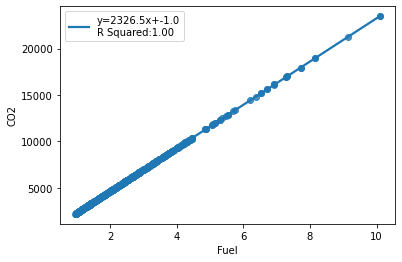

In [46]:
plot_linreg(non0dat.vehicle_fuel,non0dat.vehicle_co2,"Fuel","CO2")

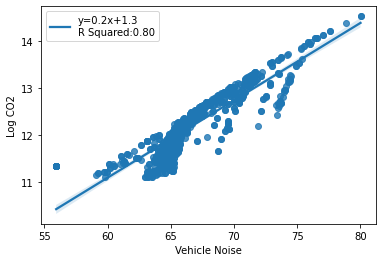

In [47]:
plot_linreg(non0dat.vehicle_noise,np.log2(non0dat.vehicle_co2+1),"Vehicle Noise","Log CO2")

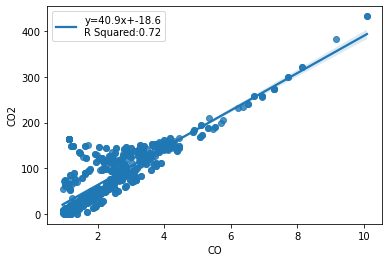

In [48]:
plot_linreg(non0dat.vehicle_fuel,non0dat.vehicle_co,"CO","CO2")